In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult_income.csv to adult_income.csv


In [ ]:
df=pd.read_csv('adult_income.csv')

# 1 Data Cleaning 

## 1.1 Duplicates 

In [ ]:
df[df.duplicated(keep='last')].sample(2)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
11965,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
8080,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K


In [ ]:
df[df.duplicated(keep='first')].sample(2)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


### methods: keep the first record and drop the duplicates row

In [ ]:
print(df.shape)
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)

(32561, 15)
(32537, 15)


# 1.2 Missing Value

In [ ]:
df.isna().sum()

Age                0
 Work-class        0
 fnlwgt            0
 Education         0
 Education-num     0
 Marital-status    0
 Occupation        0
 Relationship      0
 Race              0
 Sex               0
 Capital-gain      0
 Capital-loss      0
 Hours-per-week    0
 Native-country    0
 Income            0
dtype: int64

# 1.3 Non-standard Value

In [ ]:
# Check values in categoricals
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    print(df[i].unique())

 Work-class
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 Marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 Occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 Relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 Race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 Sex
[' Male' ' Female']
 Native-country
[' United-States' ' Cuba' ' Jamaica' '

In [ ]:
df[(df[' Work-class']==' ?')|(df[' Occupation']==' ?') |(df[' Native-country']==' ?')].shape[0]

2398

### methods：drop 2398 rows

In [ ]:
df.drop(index=df[(df[' Work-class']==' ?')|(df[' Occupation']==' ?') |(df[' Native-country']==' ?')].index,inplace=True)

In [ ]:
df.shape

(30139, 15)

## 1.4 Outlier

In [ ]:
#reconstruct a new columns:named 'Captical' 
df['Capital'] = df[' Capital-gain'] + df[' Capital-loss']
df.drop(' Capital-gain', axis=1, inplace=True)
df.drop(' Capital-loss', axis=1, inplace=True)
print(df.shape)

(30139, 14)


In [ ]:
# distribution of numerical data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Age,fnlwgt,Education-num,Hours-per-week,Capital
count,30139.00,30139.00,30139.00,30139.00,30139.00
mean,38.44,189795.03,10.12,40.93,1181.28
std,13.13,105658.62,2.55,11.98,7407.10
min,17.00,13769.00,1.00,1.00,0.00
25%,28.00,117627.50,9.00,40.00,0.00
50%,37.00,178417.00,10.00,40.00,0.00
75%,47.00,237604.50,13.00,45.00,0.00
max,90.00,1484705.00,16.00,99.00,99999.00


In [ ]:
# check outliers for numerical data using boxplot
for i in df.select_dtypes(include=['int64']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    plt.boxplot(drop[i], vert=False)
    plt.title("Detecting outliers using Boxplot")
    plt.xlabel(str(i))
    plt.show()

Age


NameError: ignored

<Figure size 1000x600 with 0 Axes>

### methods: drop outliers about capital

In [ ]:
# According to the boxplot, suggest to drop rows whenn 'Captical' is higher than 10000,
# this methods will minimize outliers while maintaining data integrity. 
def deleterows(df0,name,threshold):
    df=df0.copy()
    index=df[df[name]>=threshold].index
    drop=df.drop(index=index)
    return drop
drop=deleterows(df,'Capital',10000)
print(drop.shape[0])
print(df.shape[0]-drop.shape[0])
# drop 732 rows

29407
732


In [ ]:
databackup=df.copy()

In [ ]:
df=drop

In [ ]:
df.shape

(29407, 14)

In [ ]:
df.head(10)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Income,Capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,5178
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,0


Text(0.5, 1.0, 'Gender')

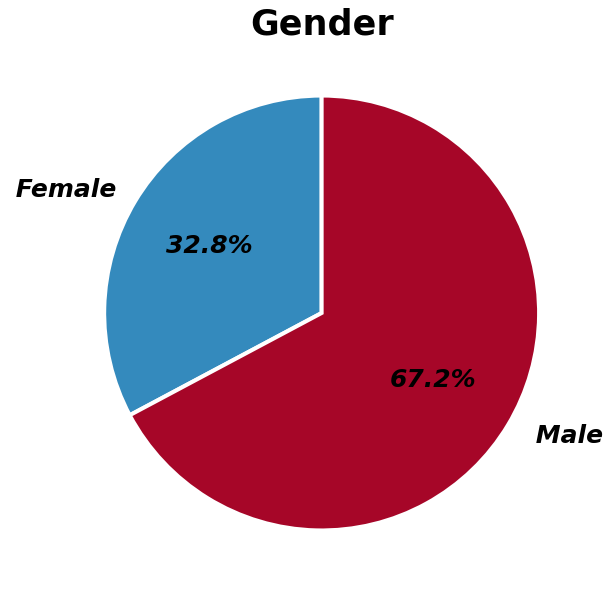

In [ ]:
plt.figure(figsize=(10,10))
df.groupby([' Sex'])[' Marital-status'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':25,'style':'italic','fontweight':'bold'}, startangle=90)
plt.title('Gender', fontweight='bold', size=35)

Text(0.5, 1.0, 'Income')

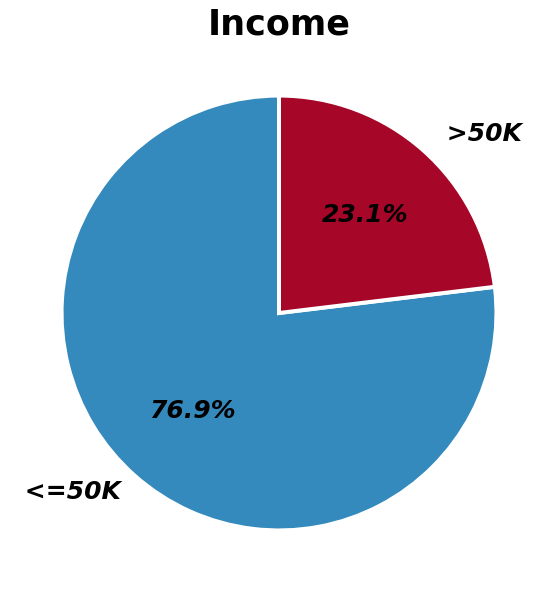

In [ ]:
plt.figure(figsize=(10,10))
df.groupby([' Income'])[' Marital-status'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':25,'style':'italic','fontweight':'bold'}, startangle=90)
plt.title('Income', fontweight='bold', size=35)

Text(0.5, 1.0, 'Education')

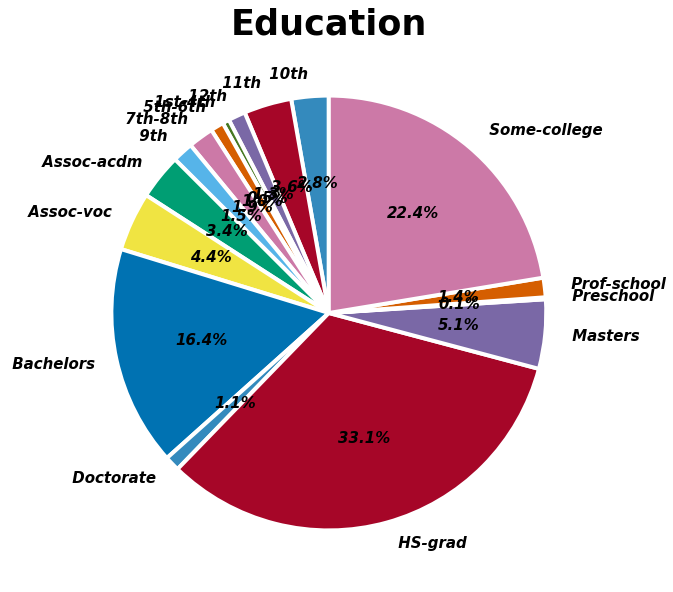

In [ ]:
plt.figure(figsize=(10,10))
df.groupby([' Education'])[' Marital-status'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':15,'style':'italic','fontweight':'bold'},startangle=90)
plt.title('Education', fontweight='bold', size=35)

Text(0.5, 1.0, 'Education')

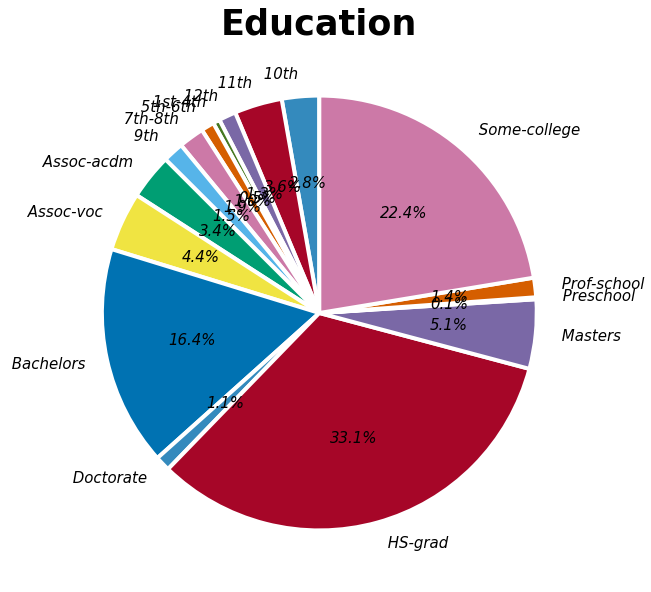

In [ ]:
plt.figure(figsize=(10,10))
df.groupby([' Education'])[' Marital-status'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':15,'style':'italic'},startangle=90)
plt.title('Education', fontweight='bold', size=35)

In [ ]:
df.head(3)

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Income,Capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0


In [ ]:
df['Age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 42, 30, 23, 32, 34, 25, 43, 40, 54,
       35, 59, 56, 19, 20, 45, 22, 48, 21, 31, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86])

In [ ]:
Tens = df[(df['Age']>=10) & (df['Age']<20) ]
Twenties = df[(df['Age']>=20) & (df['Age']<30) ]
Thirties = df[(df['Age']>=30) & (df['Age']<40) ]
Forties = df[(df['Age']>=40) & (df['Age']<50) ]
Fifties = df[(df['Age']>=50) & (df['Age']<60) ]
Sixties = df[(df['Age']>=60) & (df['Age']<70) ]
Seventies = df[(df['Age']>=70) & (df['Age']<80) ]
Eighties = df[(df['Age']>=80) & (df['Age']<90) ]
Nineties = df[(df['Age']>=90) & (df['Age']<100) ]


In [ ]:
Tens

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Income,Capital
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,40,United-States,<=50K,0
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,25,United-States,<=50K,0
70,19,Private,101509,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,32,United-States,<=50K,0
78,18,Private,309634,11th,7,Never-married,Other-service,Own-child,White,Female,22,United-States,<=50K,0
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32392,18,Private,200047,12th,8,Never-married,Adm-clerical,Own-child,White,Male,35,United-States,<=50K,0
32437,19,Private,60890,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,49,United-States,<=50K,0
32443,18,Private,41381,HS-grad,9,Never-married,Sales,Own-child,White,Female,20,United-States,<=50K,1602
32447,17,Private,117798,10th,6,Never-married,Other-service,Own-child,White,Male,20,United-States,<=50K,0


In [ ]:
df['Age']

0        39
1        50
2        38
3        53
4        28
         ..
32555    22
32556    27
32557    40
32558    58
32559    22
Name: Age, Length: 29407, dtype: int64

In [ ]:
Tens['Age_group'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Tens['Age_group'] = '10s'
Twenties['Age_group'] = '20s'
Thirties['Age_group'] = '30s'
Forties['Age_group'] = '40s'
Fifties['Age_group'] = '50s'
Sixties['Age_group'] = '60s'
Seventies['Age_group'] = '70s'
Eighties['Age_group'] = '80s'
Nineties['Age_group'] = '90s'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
age_group = pd.concat([Tens,Twenties,Thirties,Forties,Fifties,Sixties,Seventies,Eighties,Nineties])


In [ ]:
age_group

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Income,Capital,Age_group
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,40,United-States,<=50K,0,10s
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,25,United-States,<=50K,0,10s
70,19,Private,101509,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,32,United-States,<=50K,0,10s
78,18,Private,309634,11th,7,Never-married,Other-service,Own-child,White,Female,22,United-States,<=50K,0,10s
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,30,United-States,<=50K,0,10s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,90,Self-emp-not-inc,82628,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,12,United-States,<=50K,2964,90s
28463,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,30,United-States,<=50K,0,90s
31030,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,<=50K,0,90s
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,25,United-States,<=50K,0,90s


Text(0.5, 1.0, 'Age Group Distribution')

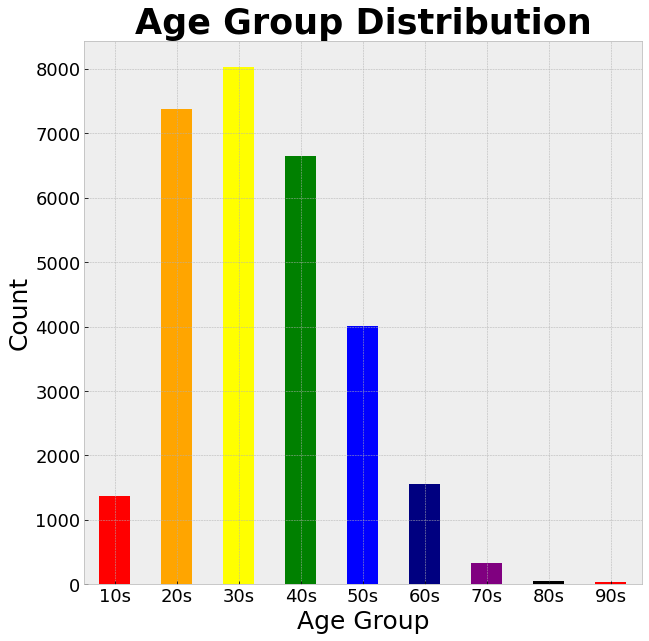

In [ ]:
plt.figure(figsize=(10,10))
age_group.groupby('Age_group')['Age'].count().plot(kind='bar',color=['red','orange','yellow','green','blue','navy','purple','black'])
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Age Group', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.title('Age Group Distribution', fontsize=35, fontweight='bold')


Text(0.5, 1.0, 'Age Group Distribution')

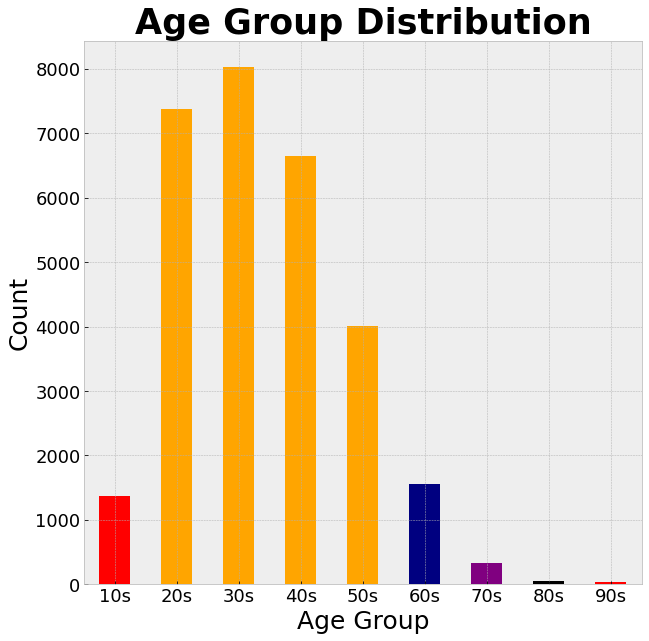

In [ ]:
plt.figure(figsize=(10,10))
age_group.groupby('Age_group')['Age'].count().plot(kind='bar',color=['red','orange','orange','orange','orange','navy','purple','black'])
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Age Group', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.title('Age Group Distribution', fontsize=35, fontweight='bold')


In [ ]:
age_group

,Age,Work-class,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Income,Capital,Age_group
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,40,United-States,<=50K,0,10s
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,25,United-States,<=50K,0,10s
70,19,Private,101509,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,32,United-States,<=50K,0,10s
78,18,Private,309634,11th,7,Never-married,Other-service,Own-child,White,Female,22,United-States,<=50K,0,10s
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,30,United-States,<=50K,0,10s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,90,Self-emp-not-inc,82628,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,12,United-States,<=50K,2964,90s
28463,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,30,United-States,<=50K,0,90s
31030,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,<=50K,0,90s
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,25,United-States,<=50K,0,90s


In [ ]:
male = age_group[age_group[' Sex'] == ' Male']

In [ ]:
type(male)

pandas.core.frame.DataFrame

In [ ]:
female = age_group[age_group[' Sex'] == ' Female']

Text(0, 0.5, 'Count')

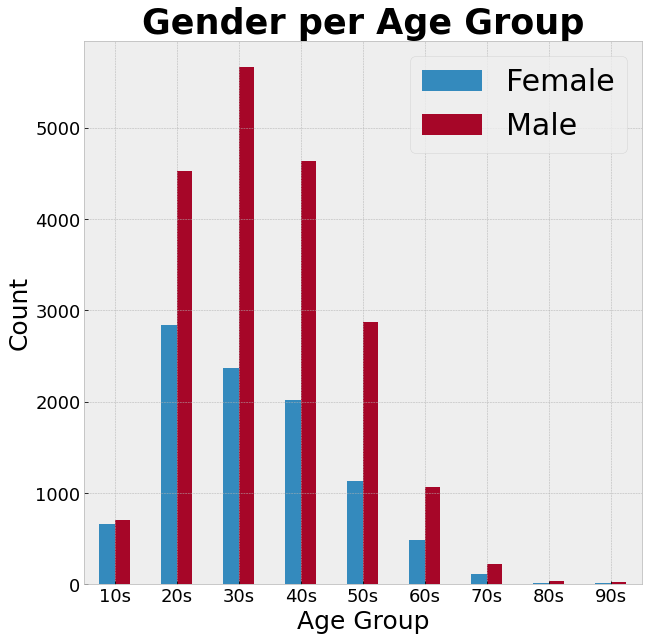

In [ ]:
#plt.figure(figsize=(50,5), dpi=150)
#fig.set_size_inches(50,15, forward=True)
plt.rcParams['figure.figsize']= (10,10)
data = {'Female': list(female.groupby('Age_group').size()),
        'Male': list(male.groupby('Age_group').size())}
df = pd.DataFrame(data, columns=['Female','Male'], index=['10s','20s','30s','40s','50s','60s','70s','80s','90s'])
df.plot.bar()
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.legend(fontsize=30, loc='upper right')
plt.title('Gender per Age Group', fontsize=35, fontweight='bold')
plt.xlabel('Age Group', fontsize=25)
plt.ylabel('Count',fontsize=25)



In [ ]:
sns.barplot( x=age, y="train AUC", hue="methods", data=merge,capsize=.05,palette="husl")

# 2 Dependent Variable: Income

In [ ]:
#set dummy variables for income column
df['income']=df[' Income'].map(lambda x: 0 if x ==' <=50K' else 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


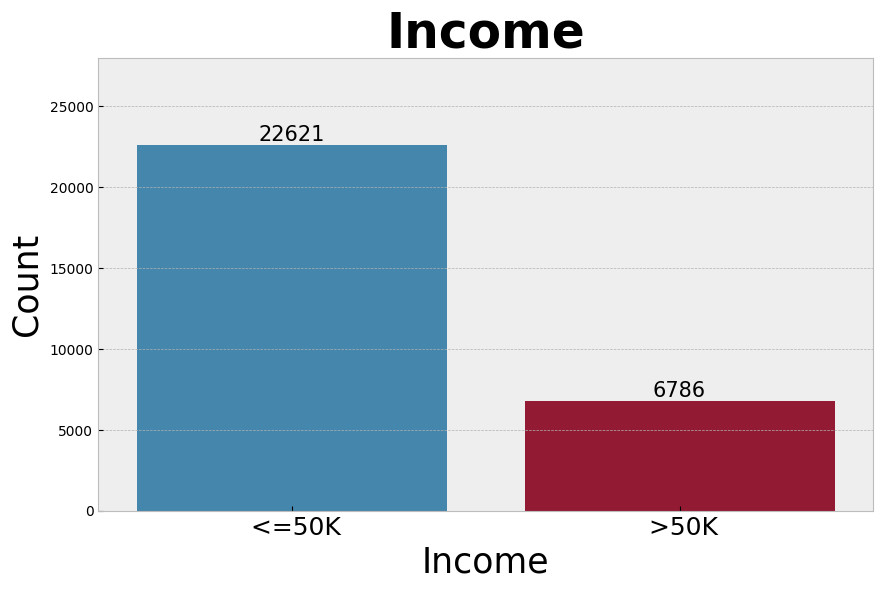

In [ ]:
# dependent varibale Counting
import seaborn as sns
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(df[' Income'])
for i,c in zip(range(2),df[' Income'].value_counts()):
    plt.text(i,c,c,ha='center', va='bottom',fontsize=15)
plt.xlabel('Income', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.ylim(0,28000)
plt.xticks(fontsize=18)
plt.title('Income',fontsize=35, fontweight='bold')
plt.show()

In [ ]:
#highly skewed, imbalanced
df['income'].skew() 

1.2781369603148889

# 3 Independent Variables

## 3.1 Numerical

In [ ]:
columns=['Age',' fnlwgt', ' Hours-per-week', 'Capital']

AttributeError: ignored

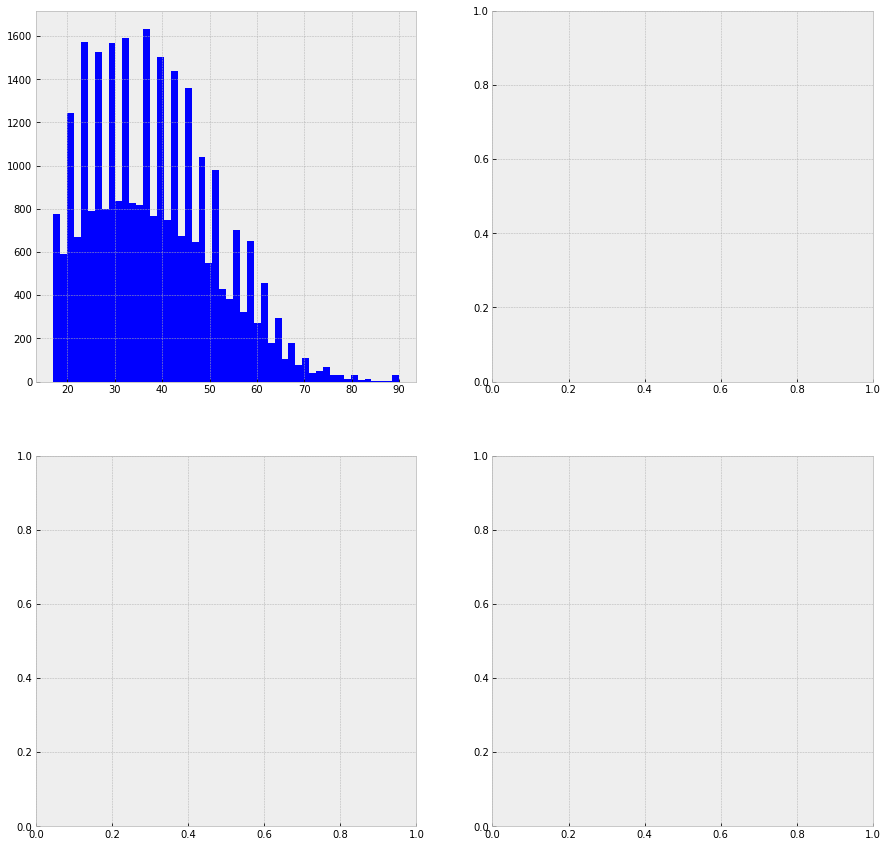

In [ ]:
df[columns].hist(figsize=(15, 15),color='blue', bins=50, xlabelsize=8, ylabelsize=8, title_size=20)


## 3.2 Categorical

In [ ]:
#create a new column "capital_join" only for EDA
#because we find that so many rows are zero showing that people are not joining in captical investment.
df['Capital_join']=df['Capital'].map(lambda x: 'Yes' if x!=0 else 'No')

In [ ]:
# Distribution of categorical variables
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    sns.countplot(df[i])
    plt.xticks(rotation=60)
    plt.show()

# 4 Correlations

## 4.1 Numerical with Income

In [ ]:
columns_=['Age', ' fnlwgt', ' Hours-per-week', 'Capital','income']

In [ ]:
sns.pairplot(df[columns_],hue="income", markers=["o", "+"])

Text(0.5, 1.0, 'Correlation')

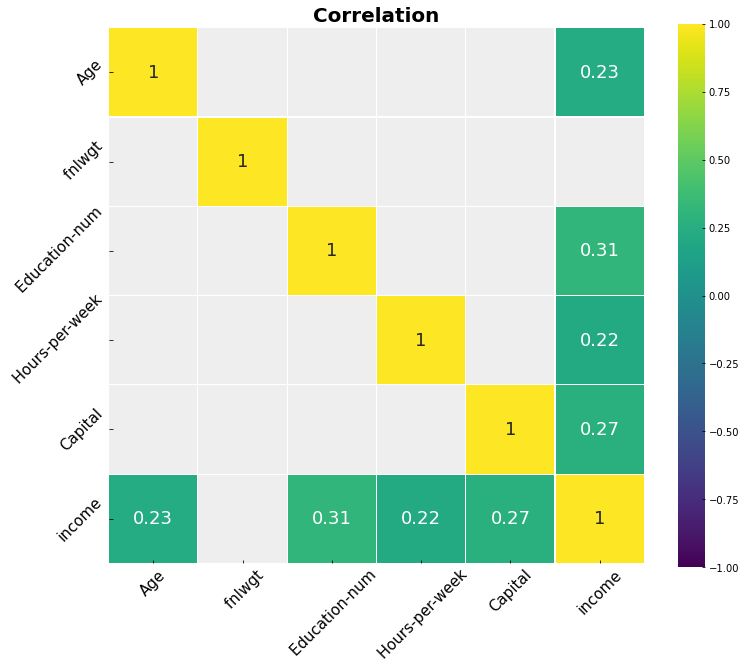

In [ ]:
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

res = sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15, rotation=45)
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 15, rotation=45)
res.set_title('Correlation', size=20, fontweight='bold')



## 4.2 Categorical with Income

## 4.2.1 average income 

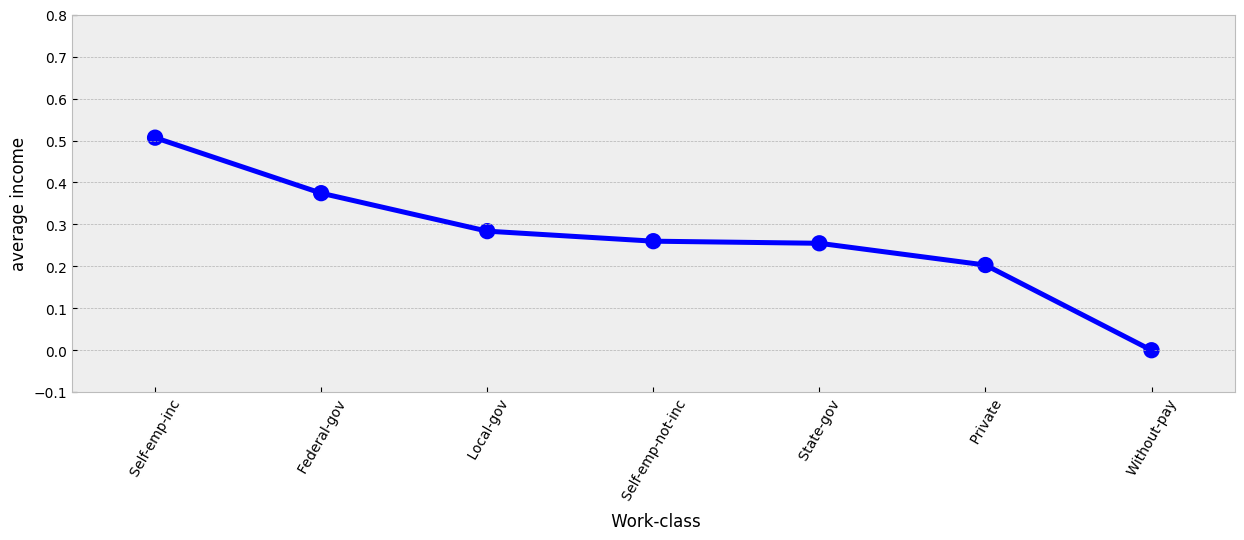

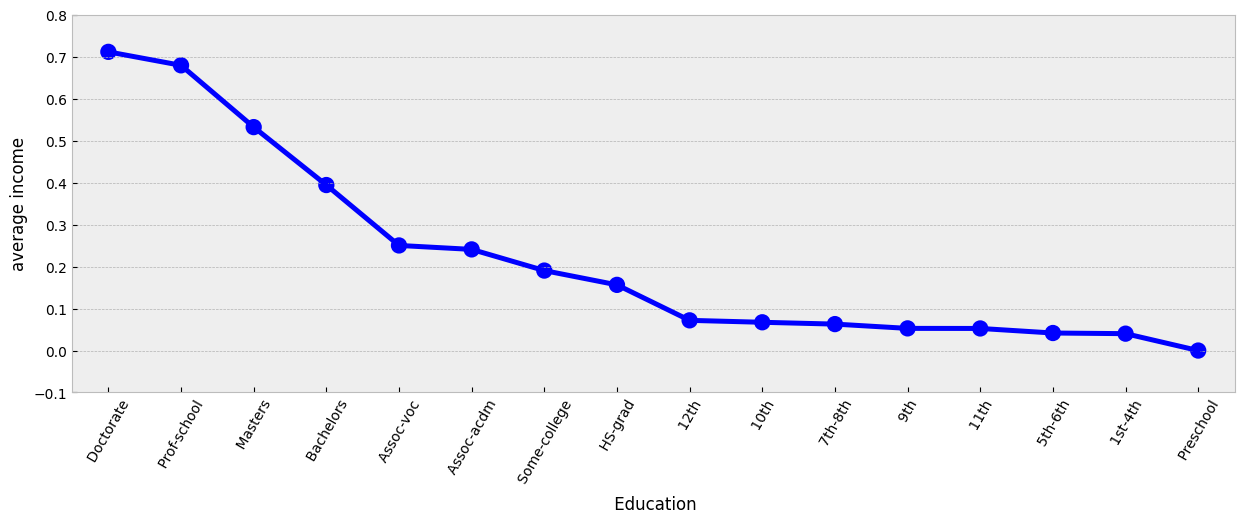

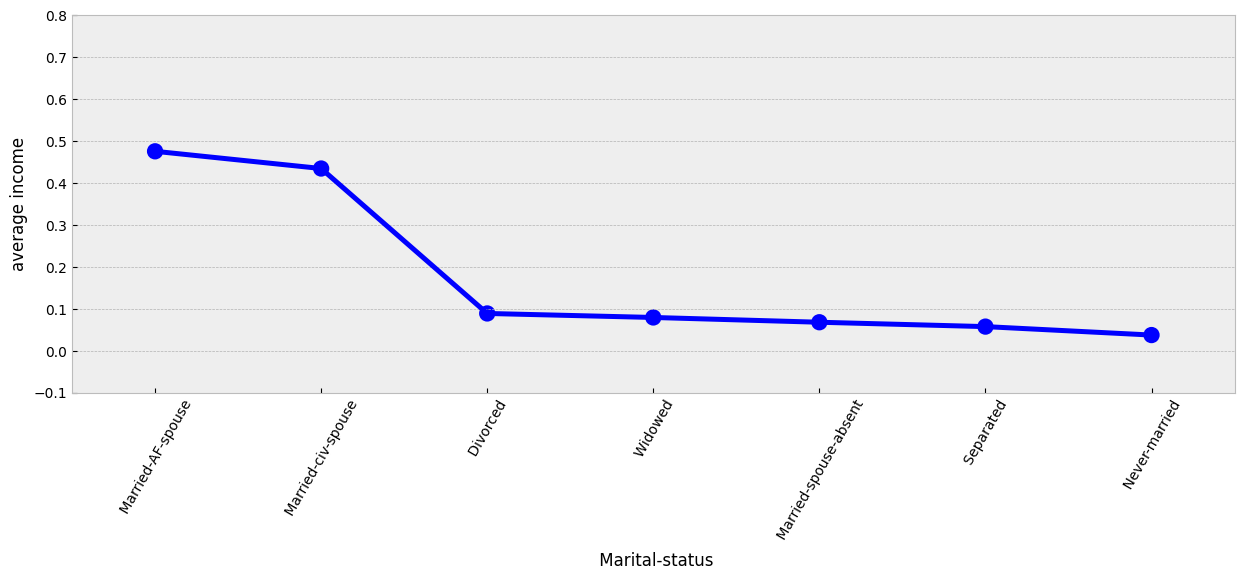

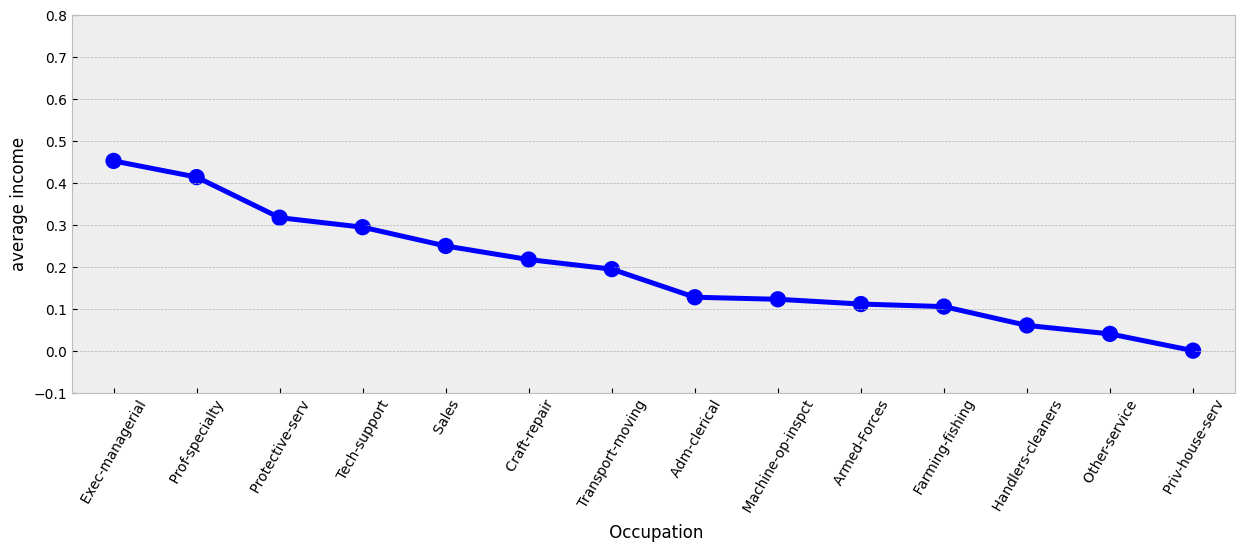

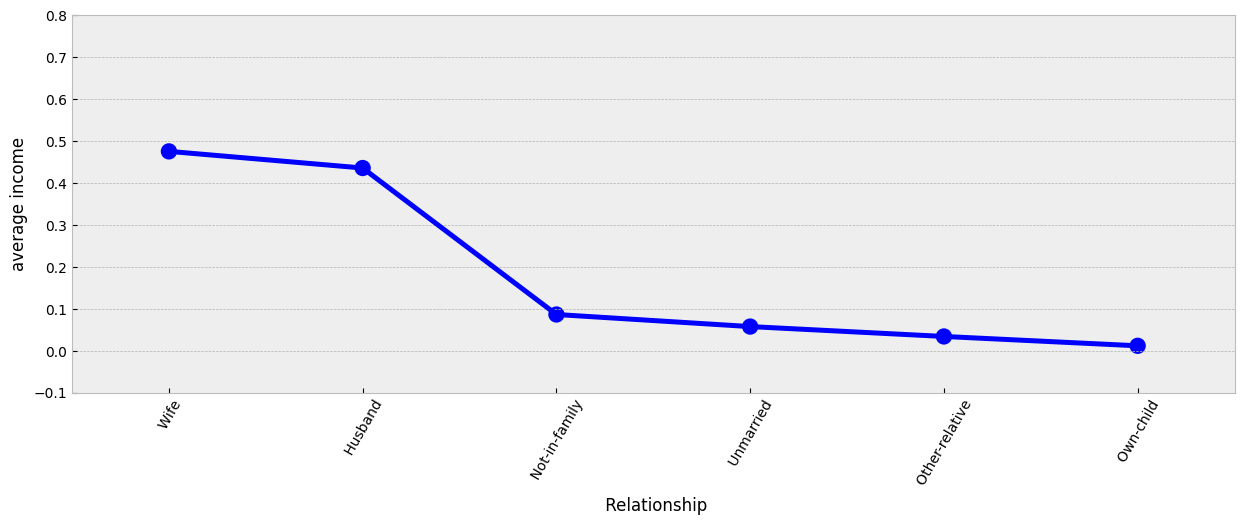

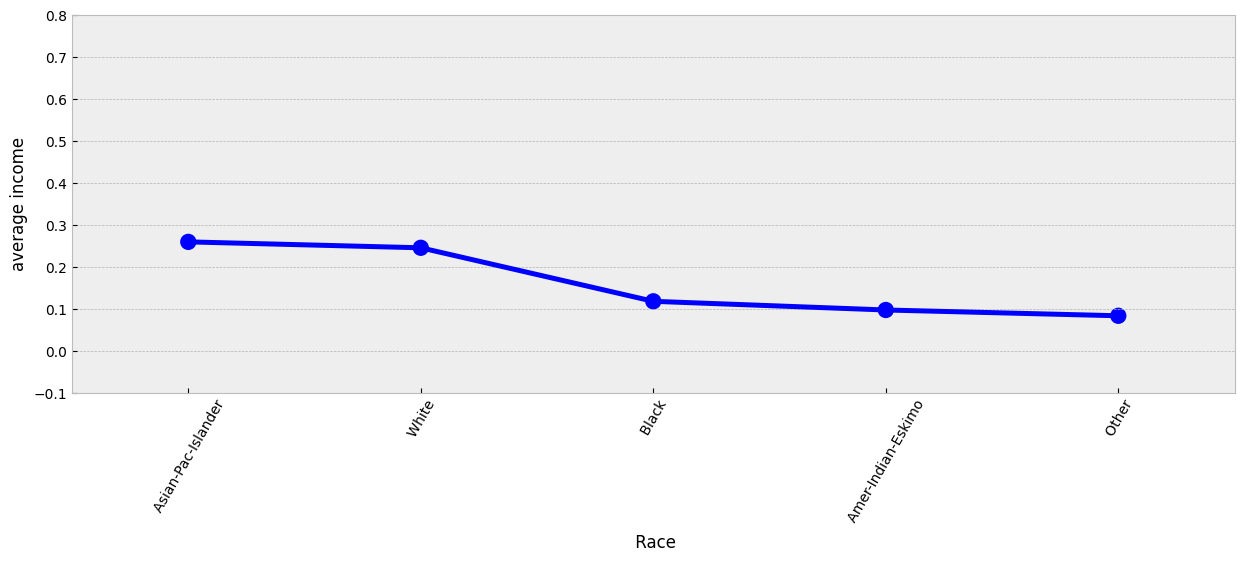

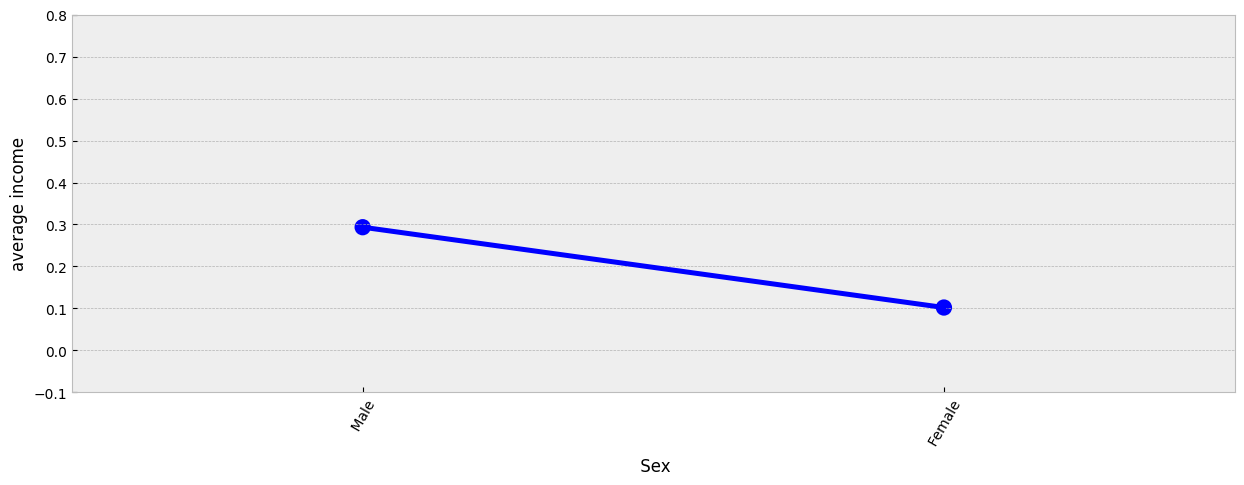

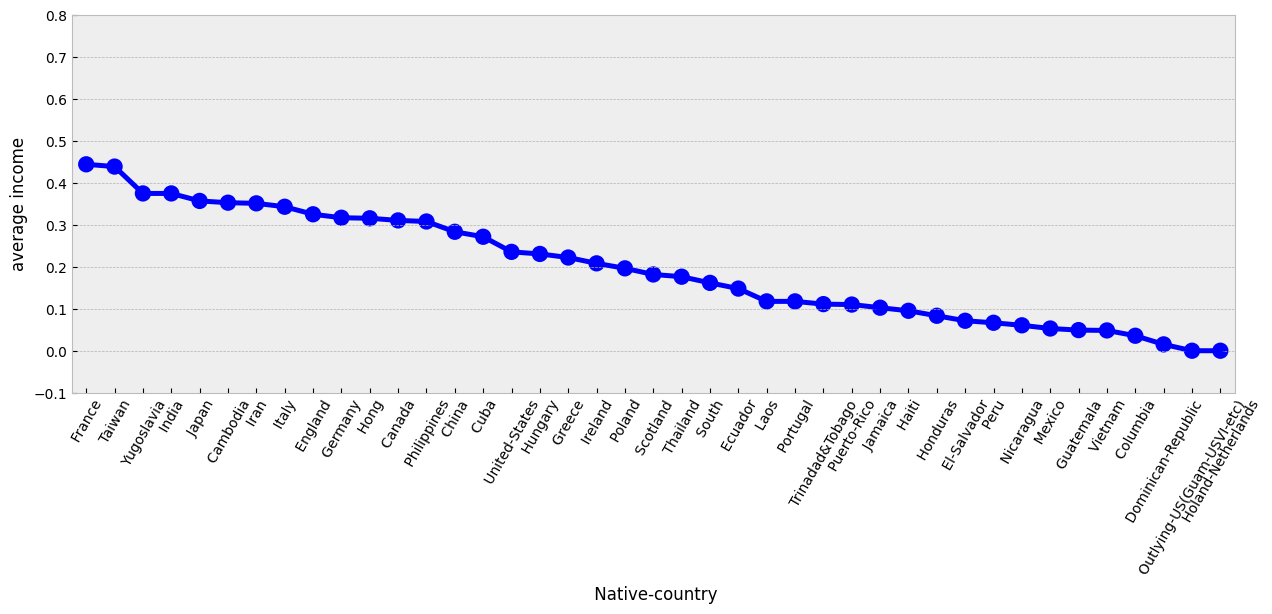

In [ ]:
# check the difference of average income in one categorical data
df_ca = df.select_dtypes(include = ['object'])
df_ca=df_ca.merge(df['income'],left_index=True,right_index=True)
df_ca.drop(' Income',axis=1,inplace=True)
for i in df_ca.columns[:-1]:
    df_tem=df_ca[[i, 'income']].groupby([i], as_index=False).mean().sort_values(by='income', ascending=False)
    plt.figure(figsize=(15,5),dpi=100)
    x=df_tem.iloc[:,0]
    y=df_tem.iloc[:,1]
    ax=sns.pointplot(x=x,y=y,color='blue')
    ax.set_ylim(-0.1,0.8)
    plt.ylabel('average income')
    plt.xticks(rotation=60)
    plt.show()

### 4.2.2 count by income for every categorical columns

 Work-class


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


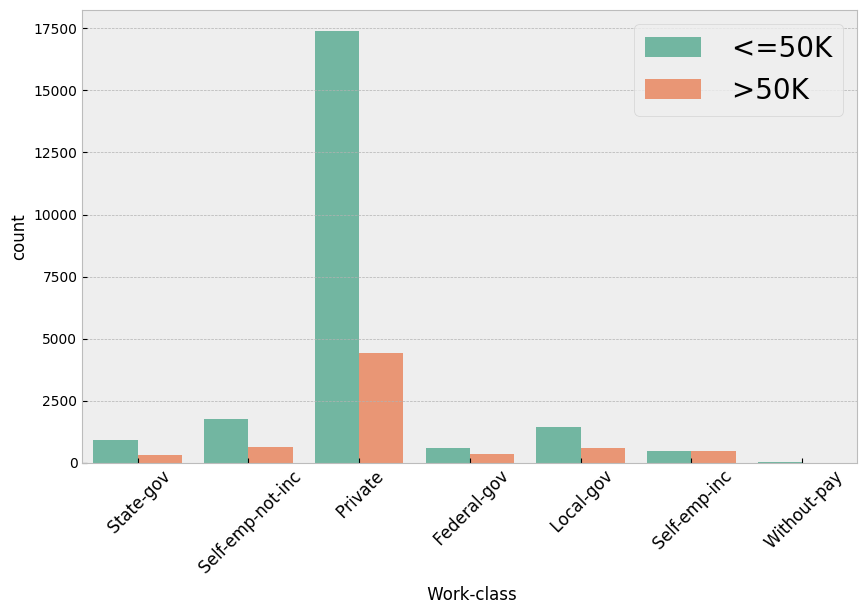

 Education


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


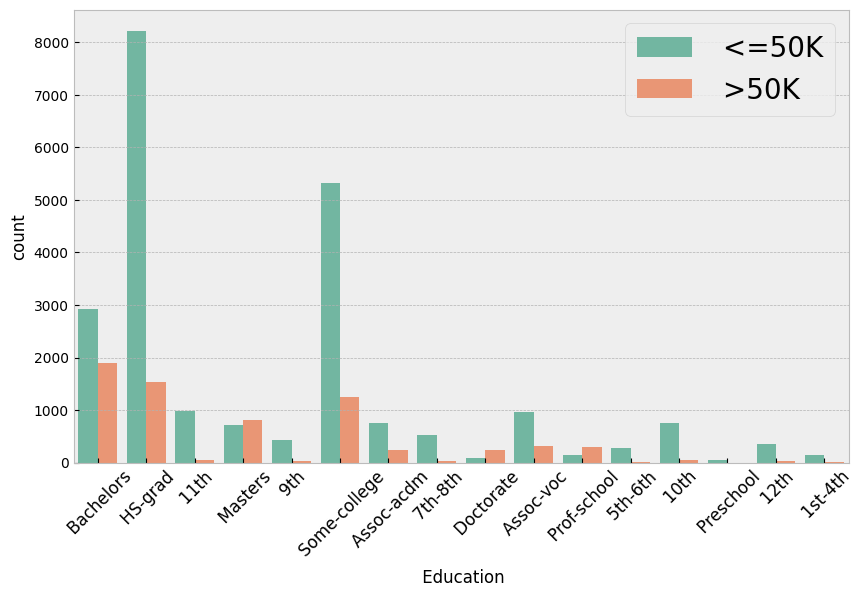

 Marital-status


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


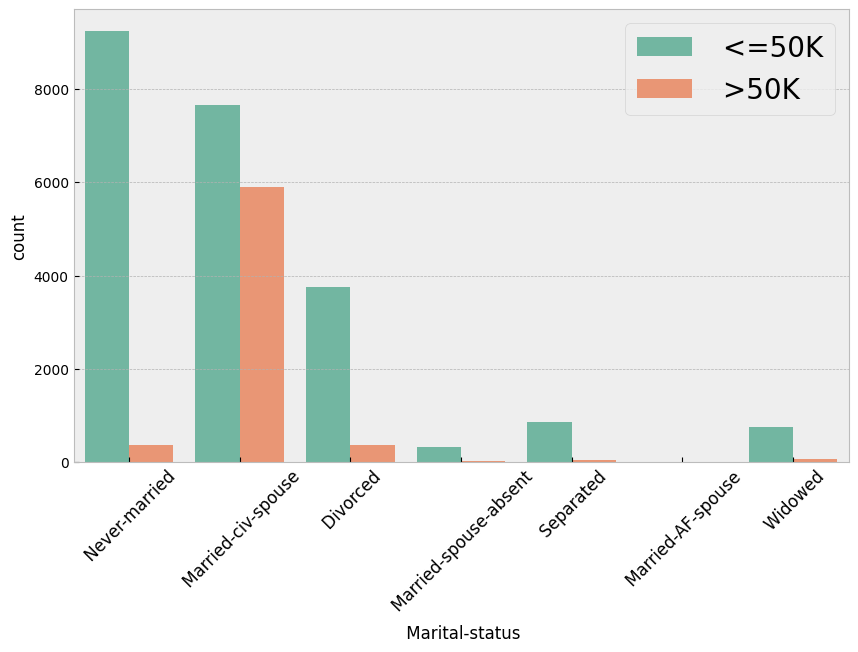

 Occupation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


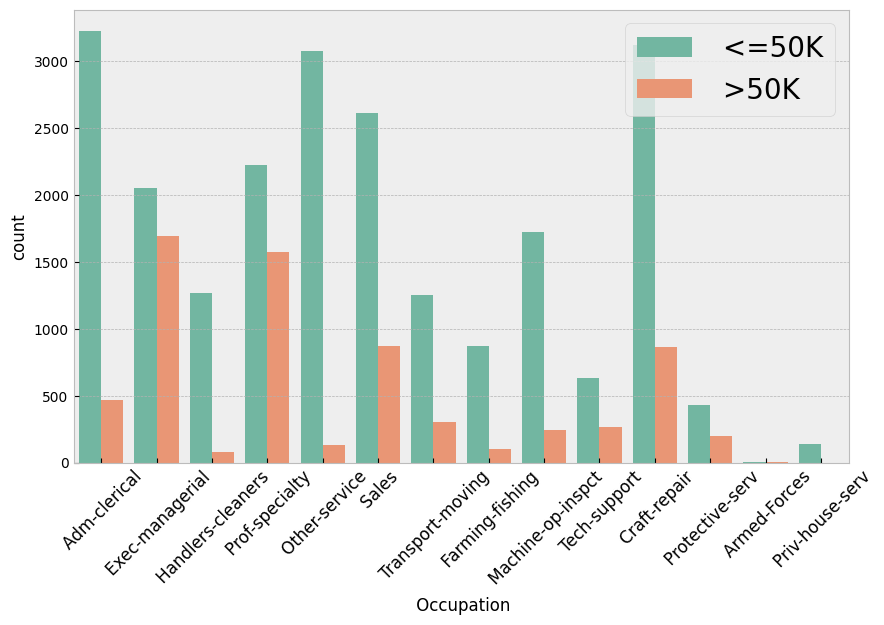

 Relationship


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


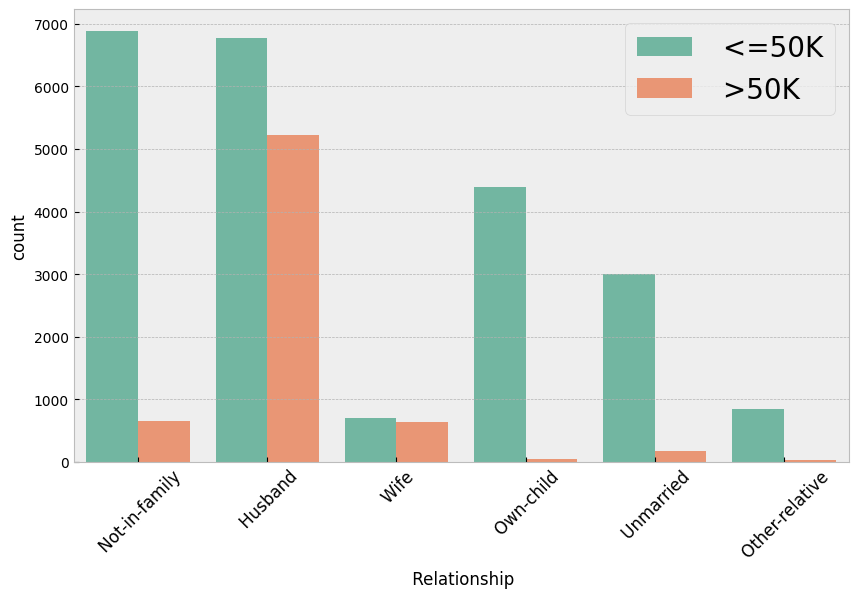

 Race


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


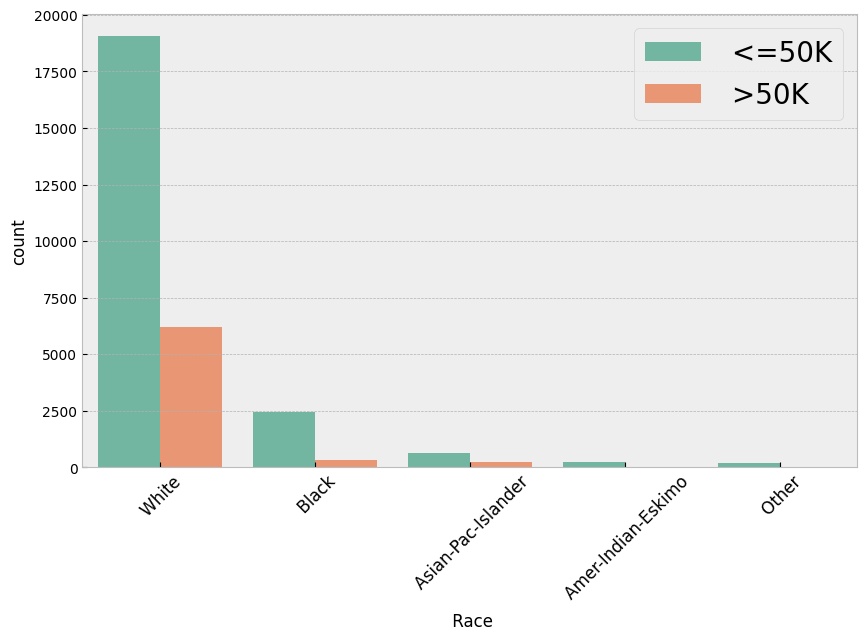

 Sex


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


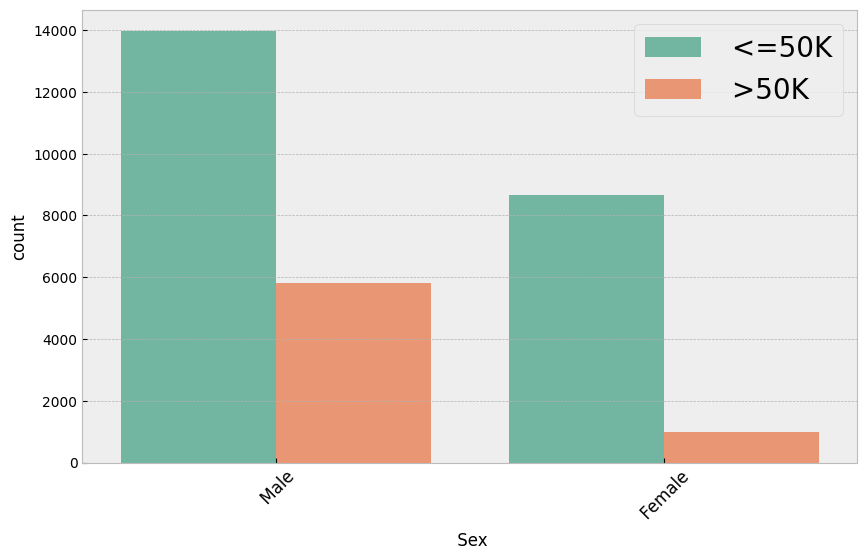

 Native-country


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


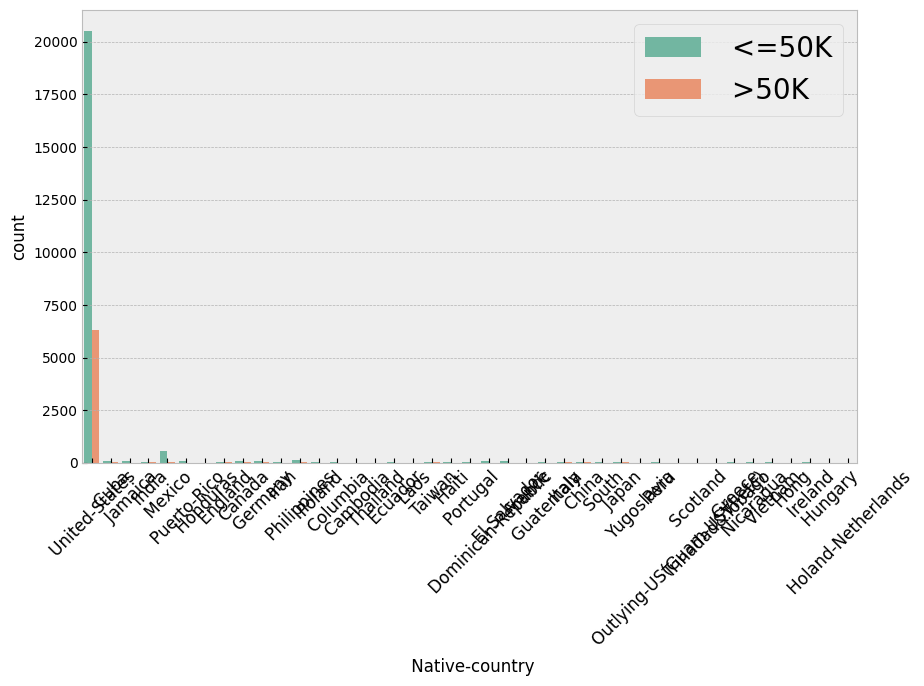

 Income


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


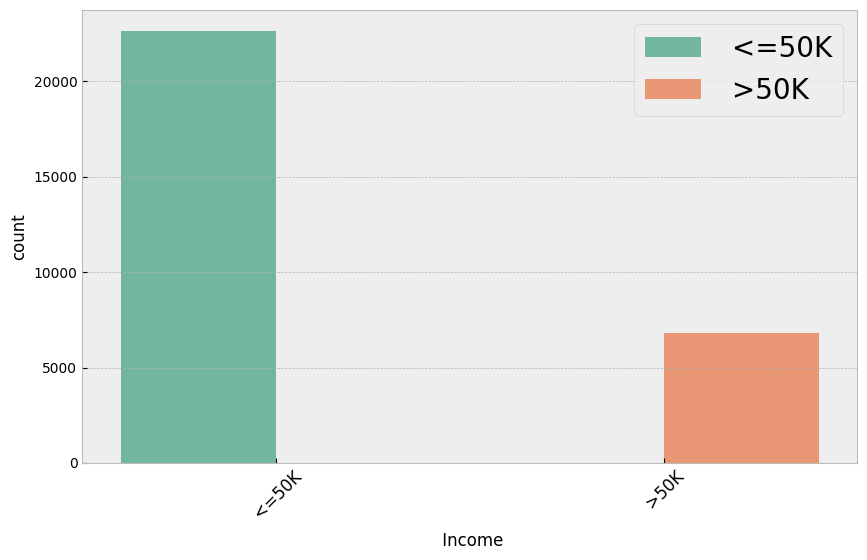

In [ ]:
# Count the two types of income for different dimensions
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    re = sns.countplot(df[i],hue=df[' Income'],palette="Set2")
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(loc='upper right', fontsize=20)
    plt.show()

### 4.2.3 Count by income in Sex==Female
- interesting findings in the  Education,marital-status

 Work-class


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


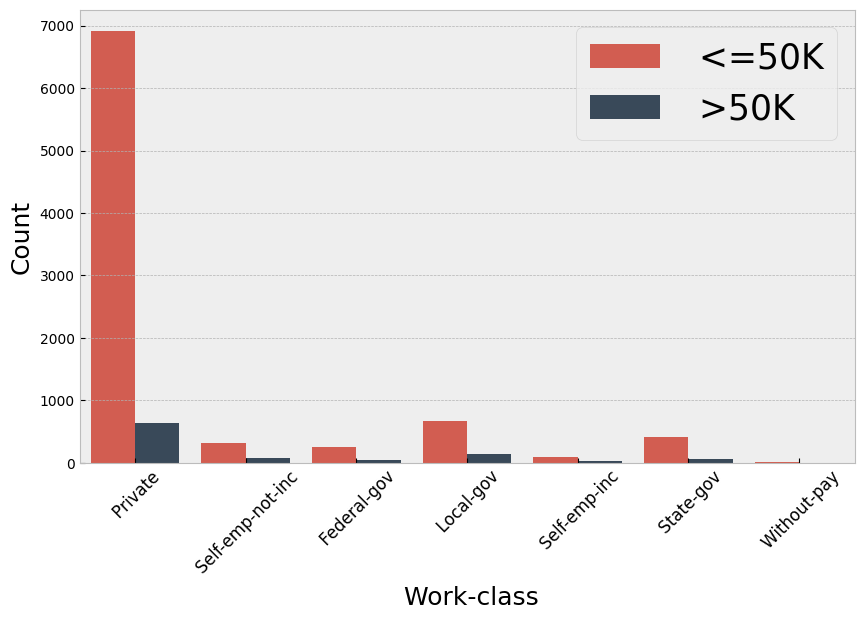

 Education


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


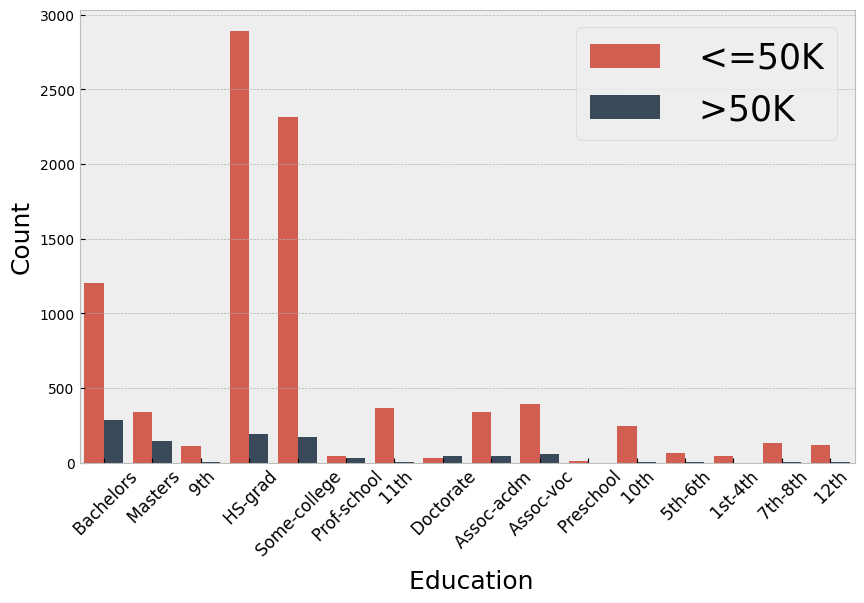

 Marital-status


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


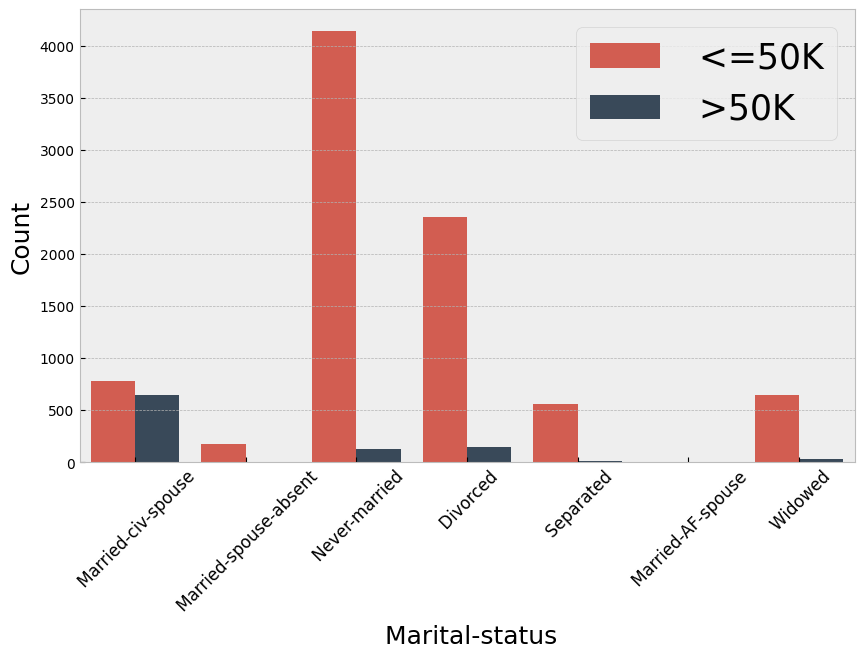

 Occupation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


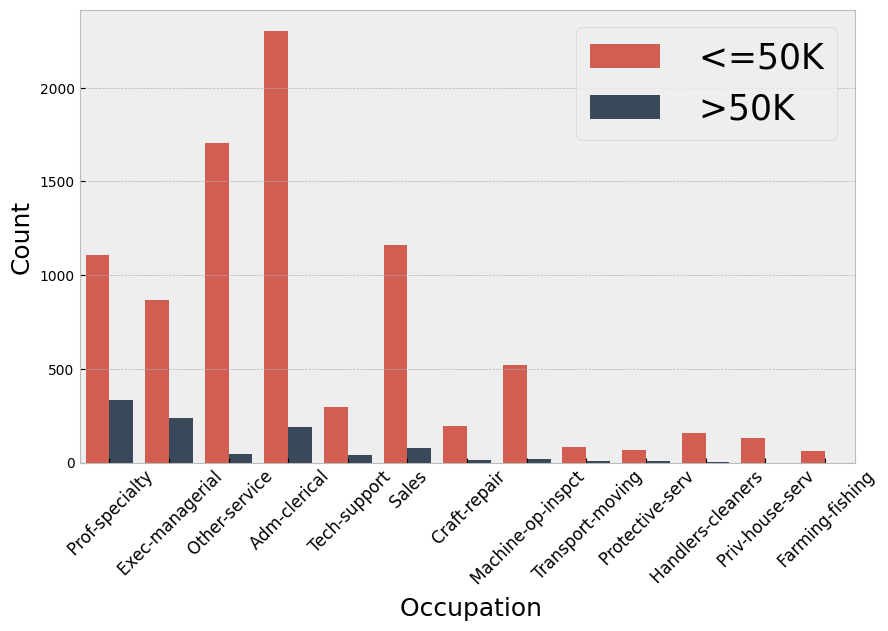

 Relationship


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


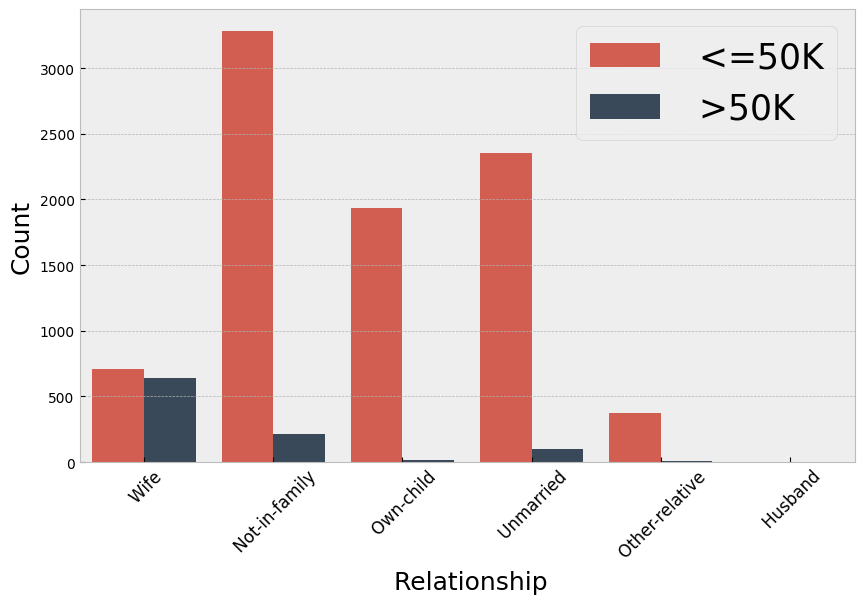

 Race


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


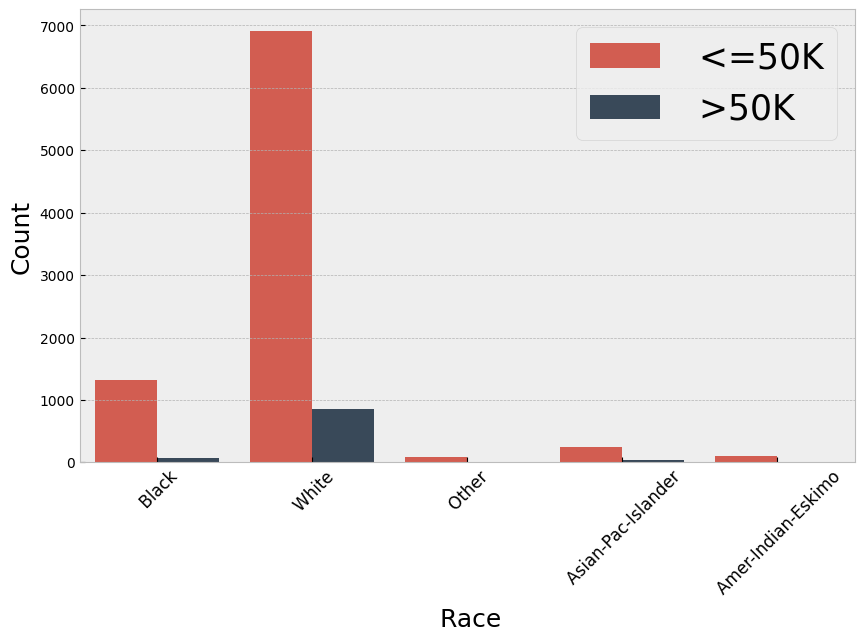

 Sex


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


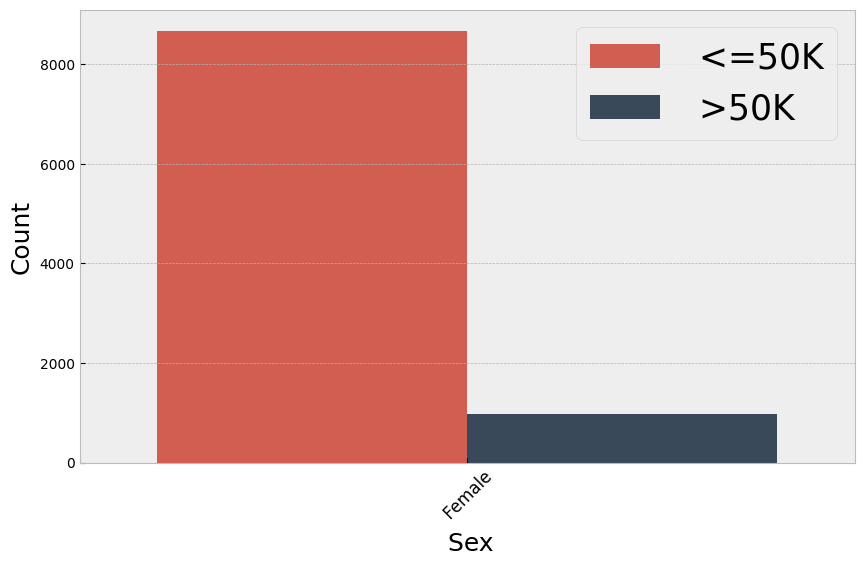

 Native-country


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


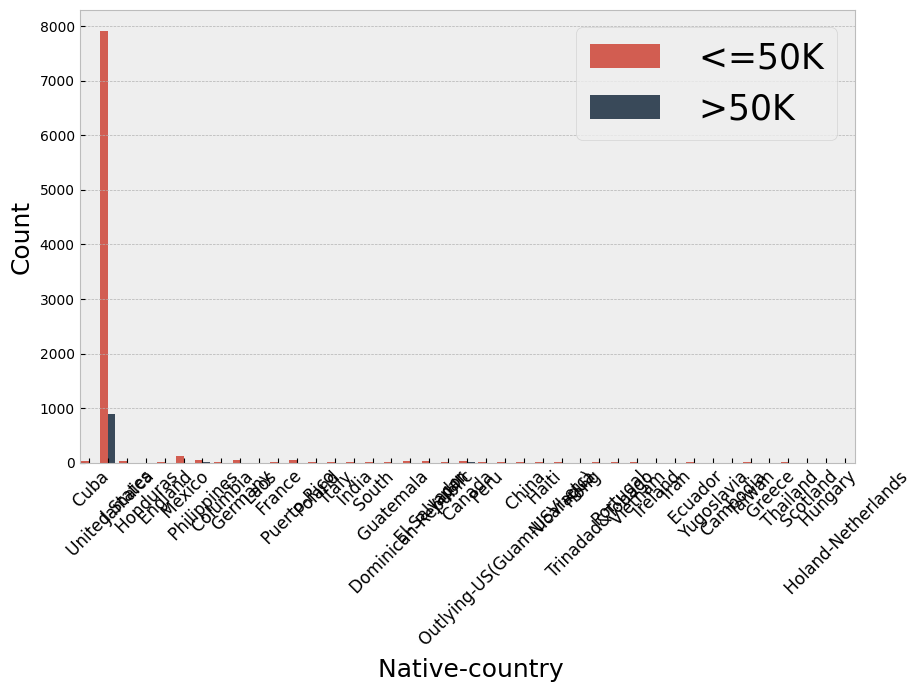

 Income


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


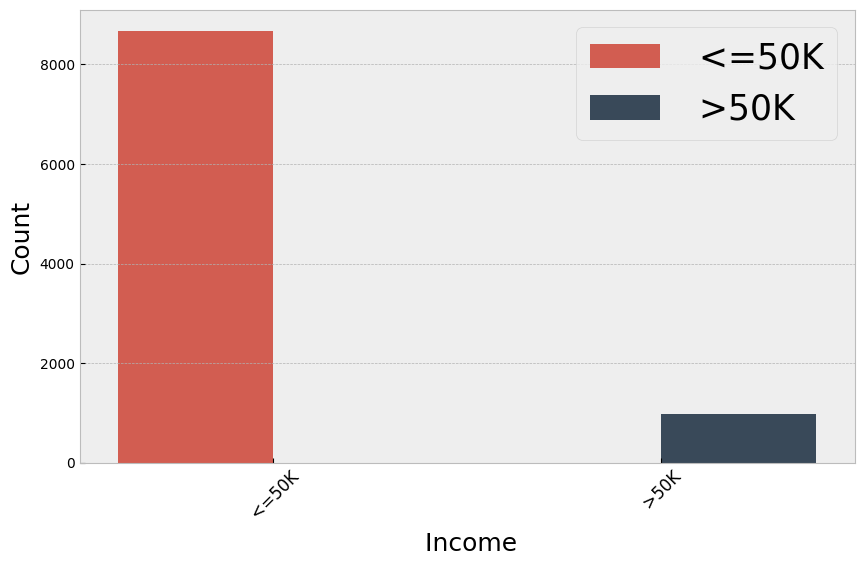

In [ ]:
for i in df.select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.countplot(df[df[' Sex']==' Female'][i],hue=df[' Income'],palette=flatui[3:])
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Count', fontsize=18) 
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(loc='upper right',fontsize=25)
    plt.show()

### 4.2.4 Count by income when sex==Male

In [ ]:
df.iloc[:,:-2].select_dtypes(include = ['object']).columns

Index([' Work-class', ' Education', ' Marital-status', ' Occupation',
       ' Relationship', ' Race', ' Sex', ' Native-country', ' Income'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


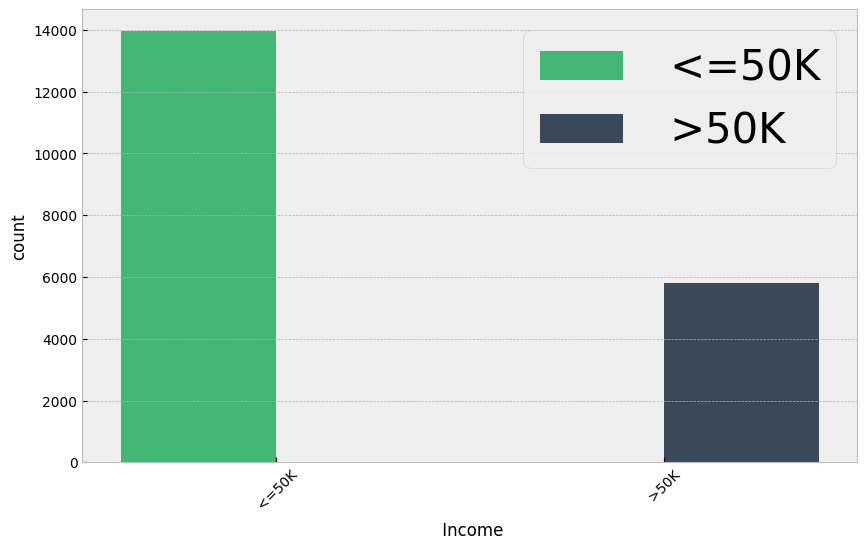

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
flatui = [  "#2ecc71","#34495e"]
sns.countplot(df[df[' Sex']==' Male'][i],hue=df[' Income'],palette=flatui)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=30)
plt.show()

 Work-class


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


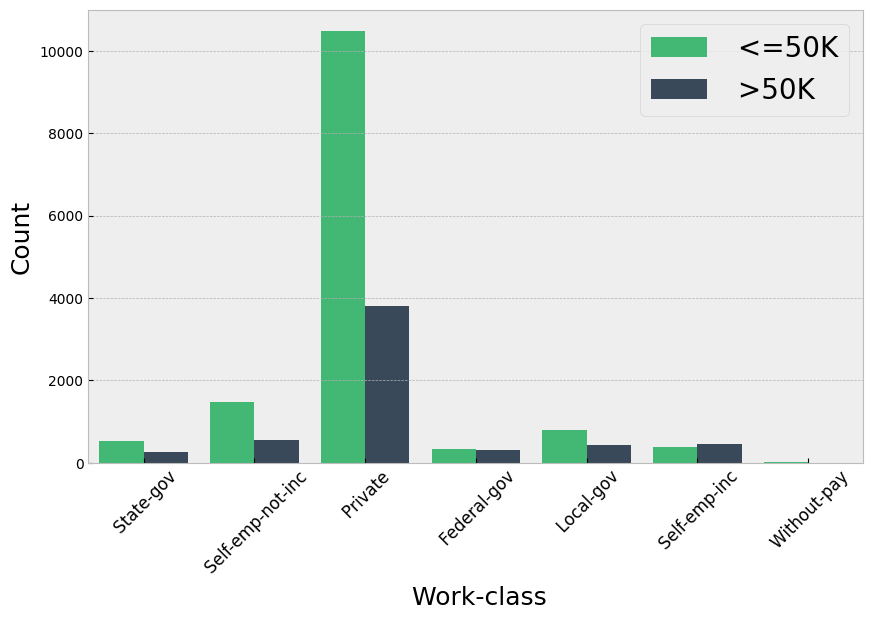

 Education


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


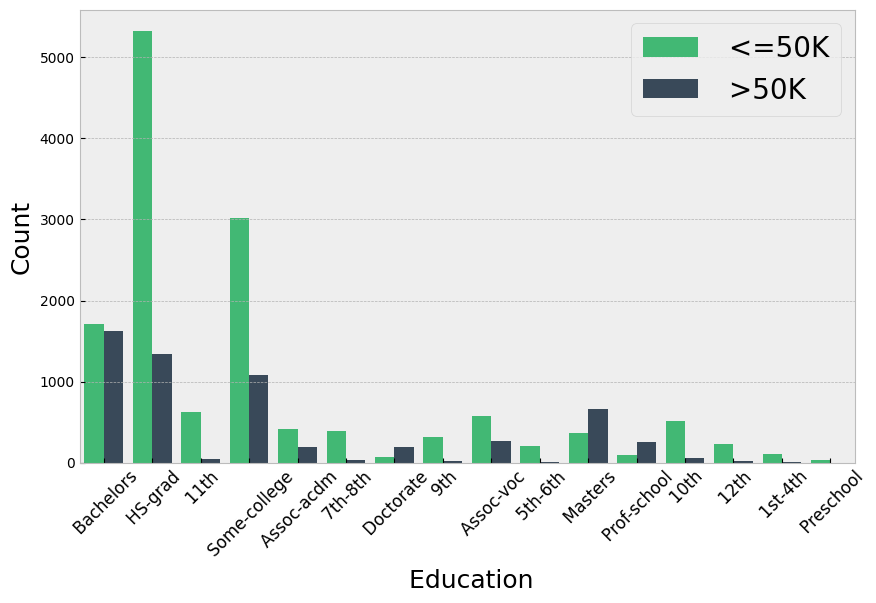

 Marital-status


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


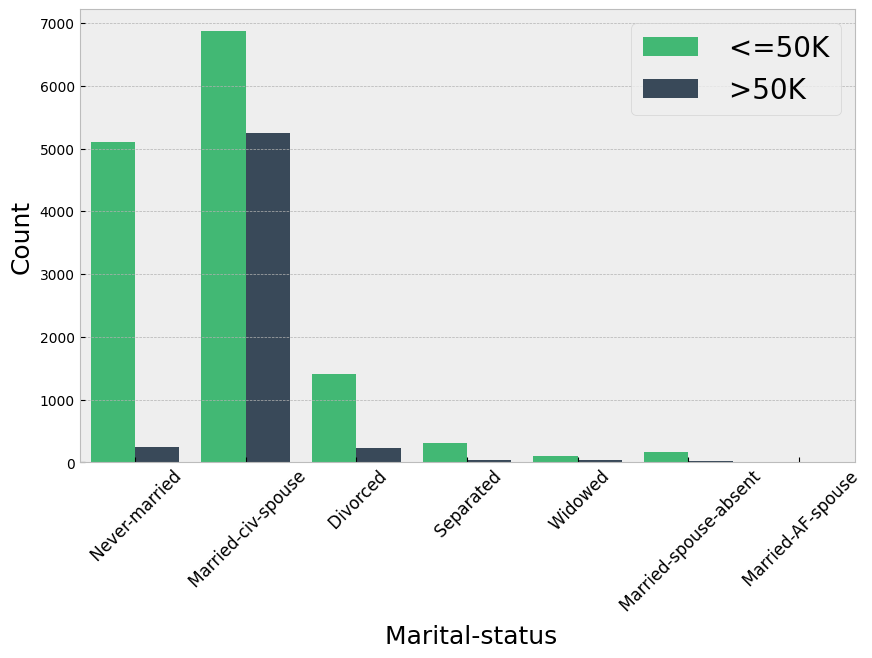

 Occupation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


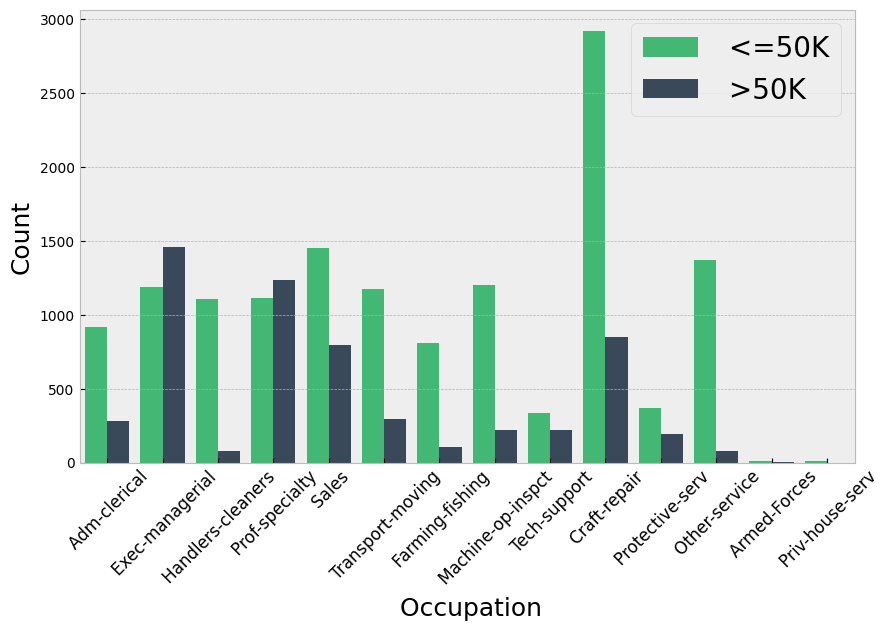

 Relationship


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


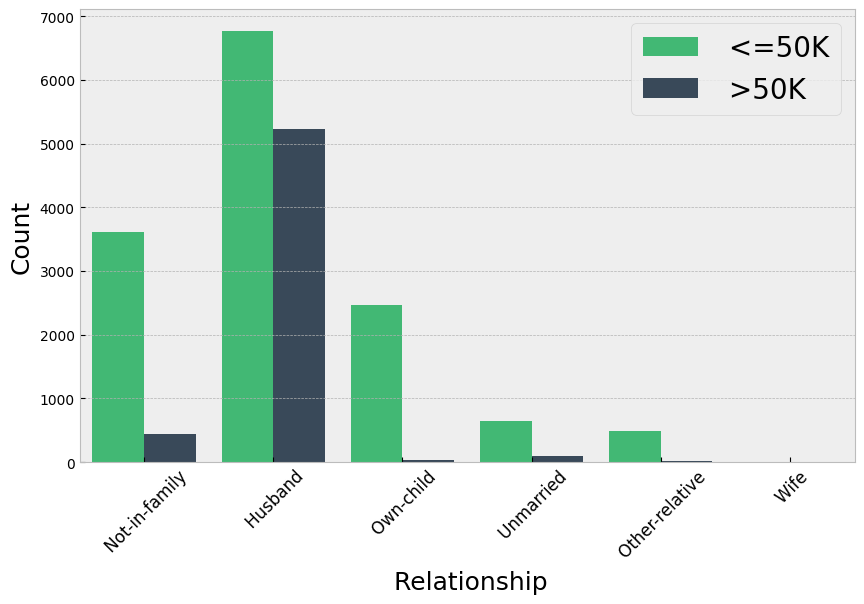

 Race


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


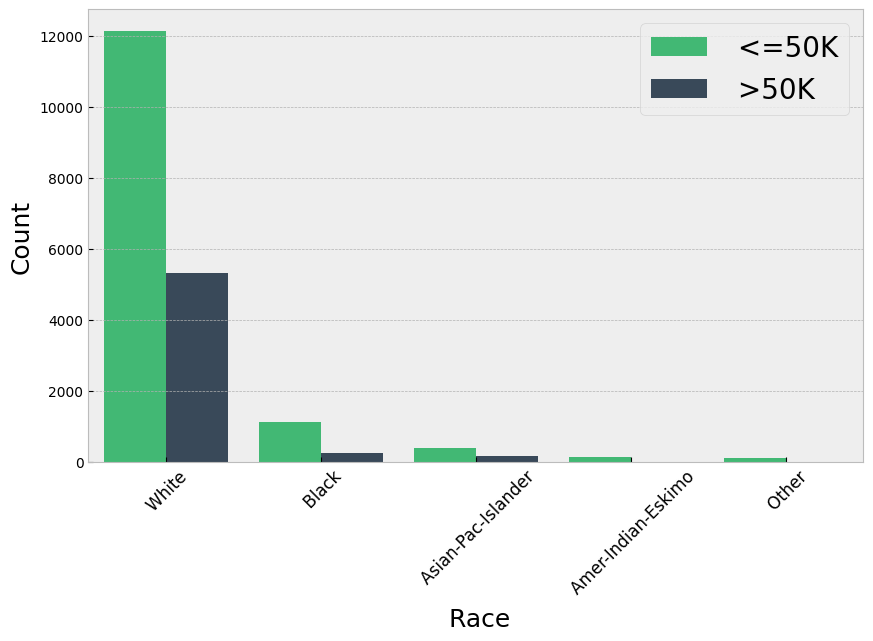

 Sex


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


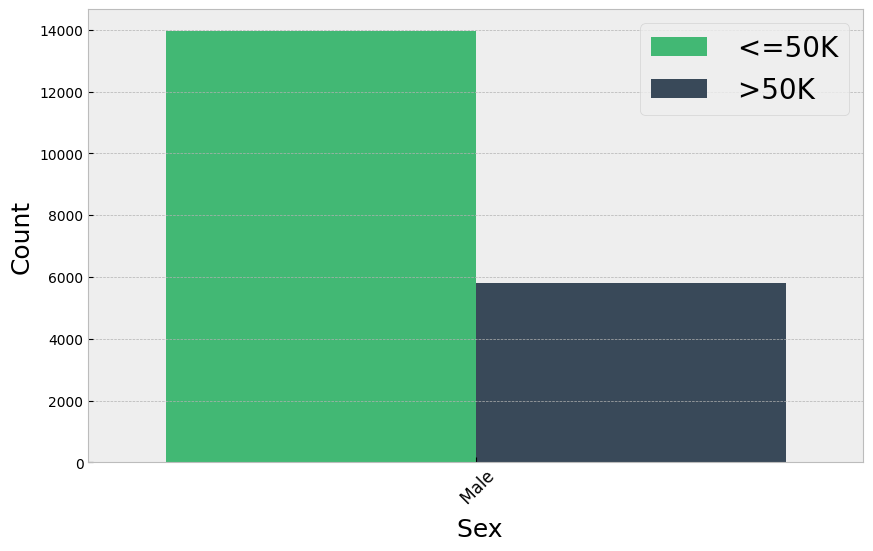

 Native-country


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


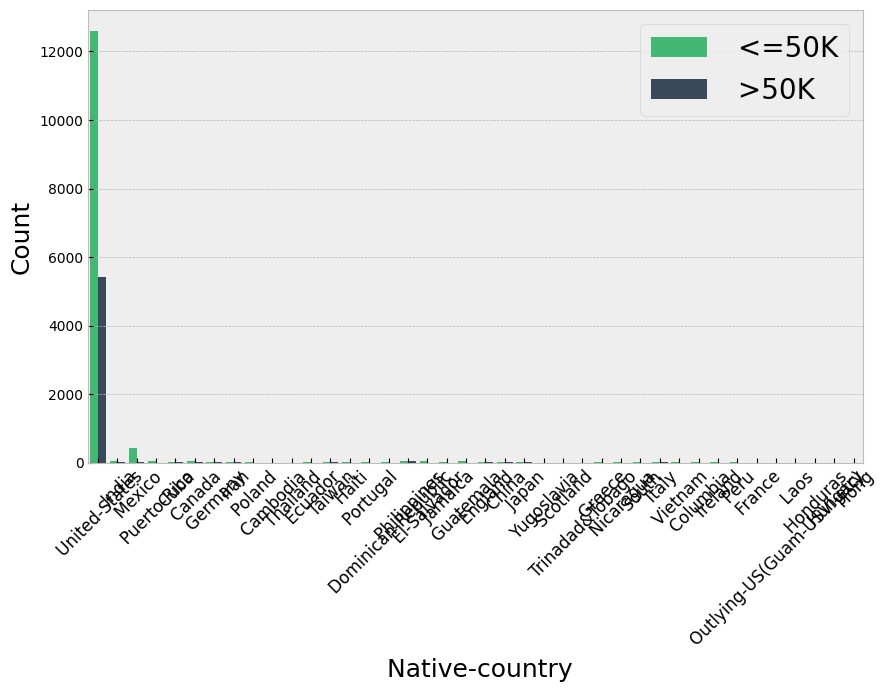

 Income


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


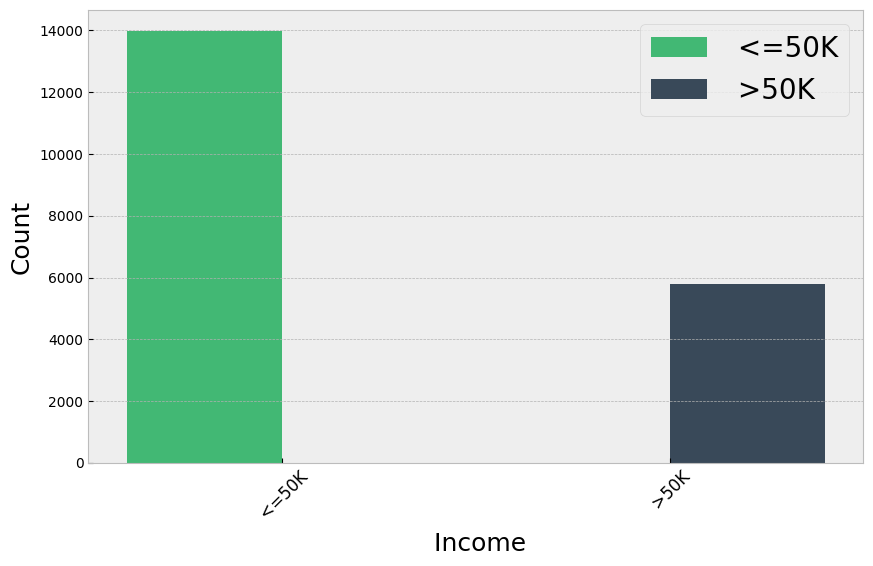

In [ ]:
for i in df.iloc[:,:-2].select_dtypes(include = ['object']).columns:
    print(i)
    plt.figure(figsize=(10,6),dpi=100)
    flatui = [  "#2ecc71","#34495e"]
    sns.countplot(df[df[' Sex']==' Male'][i],hue=df[' Income'],palette=flatui)
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Count', fontsize=18) 
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(loc='upper right', fontsize=20)
    plt.show()